In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree

In [77]:
df = pd.read_csv('./pacientes.csv')
df.head()

,edad,colesterol,problema_cardiaco
0,63,233,1
1,37,250,1
2,41,204,1
3,56,236,1
4,57,354,1


In [78]:
saludables = df[df['problema_cardiaco']==0]
cardiacos = df[df['problema_cardiaco']==1]

In [79]:
x_train, x_test, y_train, y_test = train_test_split(df[['edad','colesterol']],df['problema_cardiaco'],test_size=0.3)

In [80]:
arbol_decision = DecisionTreeClassifier(criterion='entropy',max_depth=2)

0.5666666666666667
|--- edad <= 54.50
|   |--- colesterol <= 273.50
|   |   |--- class: 1
|   |--- colesterol >  273.50
|   |   |--- class: 1
|--- edad >  54.50
|   |--- colesterol <= 252.50
|   |   |--- class: 1
|   |--- colesterol >  252.50
|   |   |--- class: 0



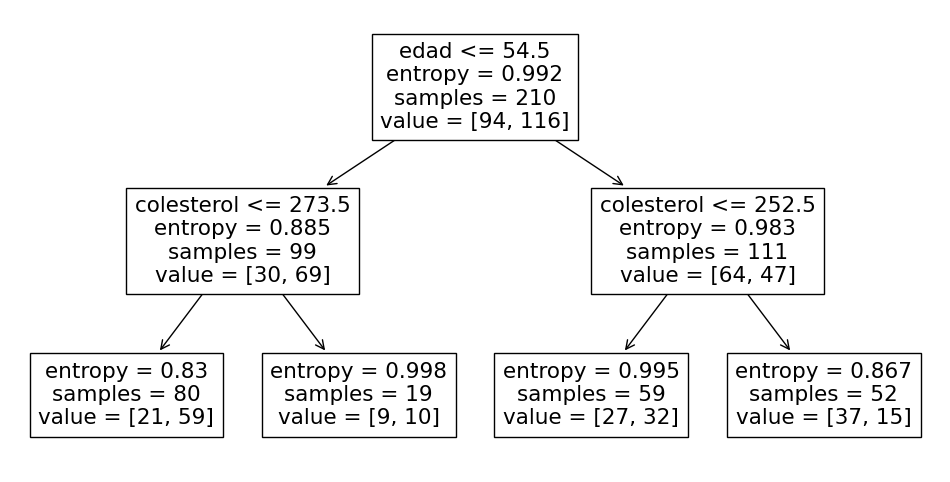

In [81]:
arbol = arbol_decision.fit(x_train,y_train)
accuracy = arbol_decision.score(x_test,y_test)

print(accuracy)
print(export_text(arbol,feature_names=['edad','colesterol']))
plt.figure(figsize=(12,6))
plot_tree(arbol,feature_names=['edad','colesterol'])
plt.show()

In [82]:
# Clasificar nuevos pacientes
print('nuevo paciente', arbol_decision.predict([[70,150]]))

nuevo paciente [1]


e:\JORGE\MyHARVARD\Curso_ML\Machine-Learning\Aprendizaje-Supervisado\Clasificacion\04-Arboles-de-decision\env\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
